<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Practical_4%20for%20WSNBFSF(21042023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Preprocessing**

In [3]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv("dataset.csv")
dataset.shape
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

In [6]:
dataset["Class"].unique()

array([0, 1, 2, 3])

**Data Balancing**

In [7]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [9]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.00000000e+00 1.00000000e-01 7.90000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963167e-01 7.80000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963500e-01 7.60000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 ...
 [4.00000000e+00 6.57891729e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 7.60000000e+01]
 [4.00000000e+00 6.58574656e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 8.00000000e+01]
 [4.00000000e+00 6.79054956e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 9.00000000e+01]]
[0 0 0 ... 1 1 1]


In [10]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 3: 29844, 1: 11766, 2: 7645})


In [11]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 1: 262851, 2: 262851, 3: 262851})


### **Data Preprocessing for Train and Testing**

In [13]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
y_test

array([0, 0, 0, ..., 0, 0, 2])

**Multinomeal Naive Bayes**

In [15]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
y_test_prediction = mnb.predict(X_test)

In [16]:
len(y_test_prediction)

210281

In [17]:
len(y_test)

210281

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='GnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[29216 14428  6680  2176]
 [ 8243 28589  8897  6825]
 [13459 13257 18700  7129]
 [    0     0     3 52679]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.56      0.57     52500
           1       0.51      0.54      0.53     52554
           2       0.55      0.36      0.43     52545
           3       0.77      1.00      0.87     52682

    accuracy                           0.61    210281
   macro avg       0.60      0.61      0.60    210281
weighted avg       0.60      0.61      0.60    210281



Confusion Matrix of Multinomeal Naive Bayes


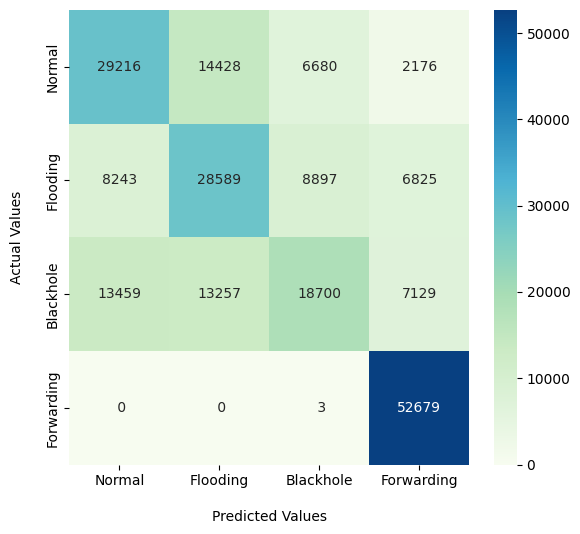

In [19]:
print("Confusion Matrix of Multinomeal Naive Bayes") 
conf_mat(y_test, y_test_prediction)

In [20]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1) 

In [21]:
performance("Multinomeal Naive Bayes",y_test, y_test_prediction)

Model Name is : Multinomeal Naive Bayes
Accuracy : 61.43398595213072
Precision : 59.83374055324951
Recall : 61.43398595213072
F1-Score : 0.5972712018218106


### **Logistic Regression (LR)**

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_test_prediction = lr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[26909 13910 11681     0]
 [12465 31952  2821  5316]
 [ 2414  2555 42685  4891]
 [    0    61   841 51780]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.51      0.57     52500
           1       0.66      0.61      0.63     52554
           2       0.74      0.81      0.77     52545
           3       0.84      0.98      0.90     52682

    accuracy                           0.73    210281
   macro avg       0.72      0.73      0.72    210281
weighted avg       0.72      0.73      0.72    210281



Confusion Matrix of Logistic Regression


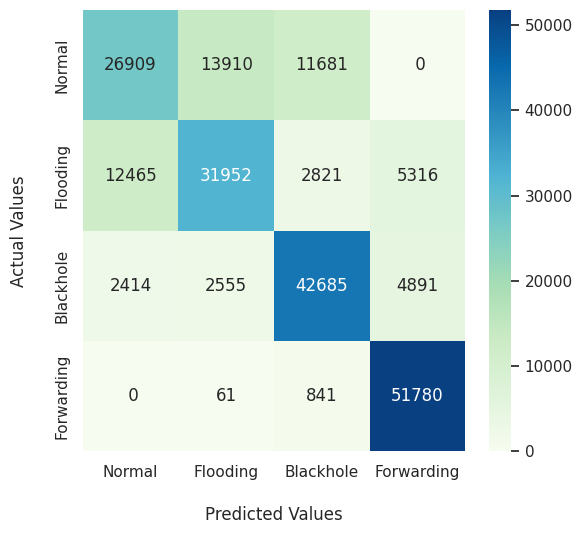

In [25]:
print("Confusion Matrix of Logistic Regression") 
conf_mat(y_test, y_test_prediction)

In [26]:
performance("Logistic Regression",y_test, y_test_prediction)

Model Name is : Logistic Regression
Accuracy : 72.91481398699835
Precision : 71.85829231236569
Recall : 72.91481398699835
F1-Score : 0.7197691477944032


**K-Nearest Neighbors (KNN)**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_test_prediction = knn.predict(X_test)

In [28]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[49214  2229  1056     1]
 [   78 52445     0    31]
 [    9     3 52495    38]
 [    0   121    60 52501]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     52500
           1       0.96      1.00      0.98     52554
           2       0.98      1.00      0.99     52545
           3       1.00      1.00      1.00     52682

    accuracy                           0.98    210281
   macro avg       0.98      0.98      0.98    210281
weighted avg       0.98      0.98      0.98    210281



Confusion Matrix of K-Nearest Neighbors


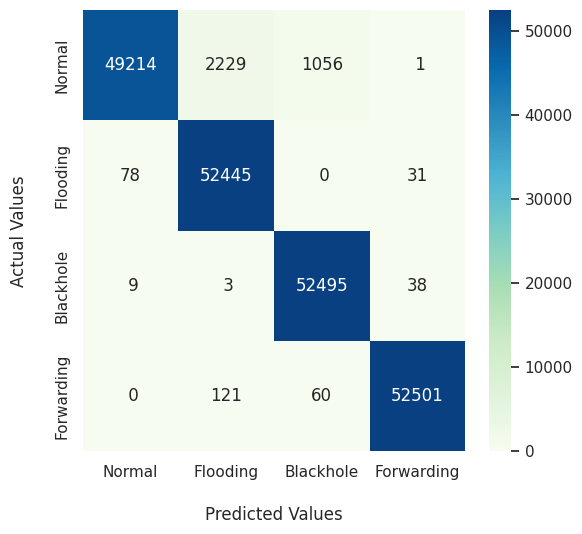

In [29]:
print("Confusion Matrix of K-Nearest Neighbors") 
conf_mat(y_test, y_test_prediction)

In [30]:
performance("K-Nearest Neighbors",y_test, y_test_prediction)

Model Name is : K-Nearest Neighbors
Accuracy : 98.27564069031439
Precision : 98.32926124150484
Recall : 98.27564069031439
F1-Score : 0.9826539592354369


**Support vector machines (SVMs)**

In [31]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
y_test_prediction = svm.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[24953 13802 13744     1]
 [ 7543 36189  3499  5323]
 [  384  2331 44925  4905]
 [    0     0     0 52682]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.48      0.58     52500
           1       0.69      0.69      0.69     52554
           2       0.72      0.85      0.78     52545
           3       0.84      1.00      0.91     52682

    accuracy                           0.75    210281
   macro avg       0.75      0.75      0.74    210281
weighted avg       0.75      0.75      0.74    210281



Confusion Matrix of SVM


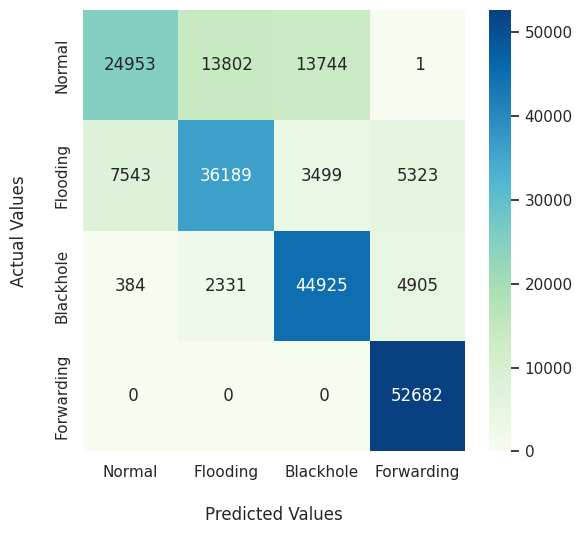

In [33]:
print("Confusion Matrix of SVM") 
conf_mat(y_test, y_test_prediction)

In [34]:
performance("SVM",y_test, y_test_prediction)

Model Name is : SVM
Accuracy : 75.49374408529539
Precision : 75.27048698532634
Recall : 75.49374408529539
F1-Score : 0.7424950350330006


**Decision Tree (DT)**

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_test_prediction = clf.predict(X_test)

In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[52485    15     0     0]
 [   24 52515     1    14]
 [    5     0 52535     5]
 [    0    12    12 52658]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52500
           1       1.00      1.00      1.00     52554
           2       1.00      1.00      1.00     52545
           3       1.00      1.00      1.00     52682

    accuracy                           1.00    210281
   macro avg       1.00      1.00      1.00    210281
weighted avg       1.00      1.00      1.00    210281



Confusion Matrix of Decision Tree


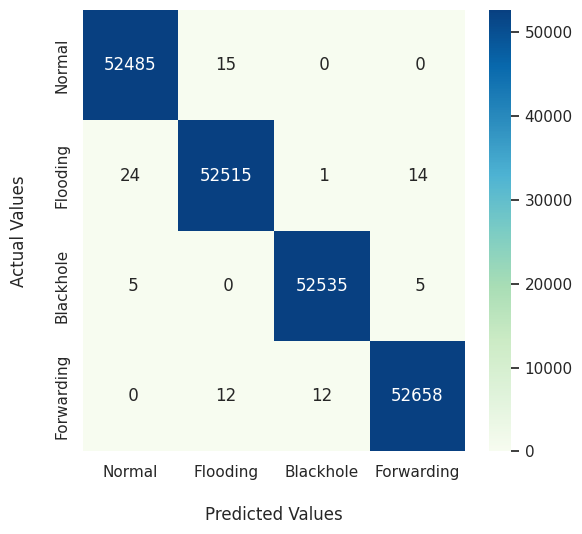

In [37]:
print("Confusion Matrix of Decision Tree") 
conf_mat(y_test, y_test_prediction)

In [38]:
performance("Decision Tree",y_test, y_test_prediction)

Model Name is : Decision Tree
Accuracy : 99.95815123572743
Precision : 99.95815147517429
Recall : 99.95815123572743
F1-Score : 0.9995815050951746


**K-means**

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)
y_test_prediction=kmeans.predict(X_test)    

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[24497  2010 24220  1773]
 [22991  1205 21547  6811]
 [22191     0 21288  9066]
 [    0 26998     0 25684]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.47      0.40     52500
           1       0.04      0.02      0.03     52554
           2       0.32      0.41      0.36     52545
           3       0.59      0.49      0.53     52682

    accuracy                           0.35    210281
   macro avg       0.33      0.35      0.33    210281
weighted avg       0.33      0.35      0.33    210281



Confusion Matrix of K-means


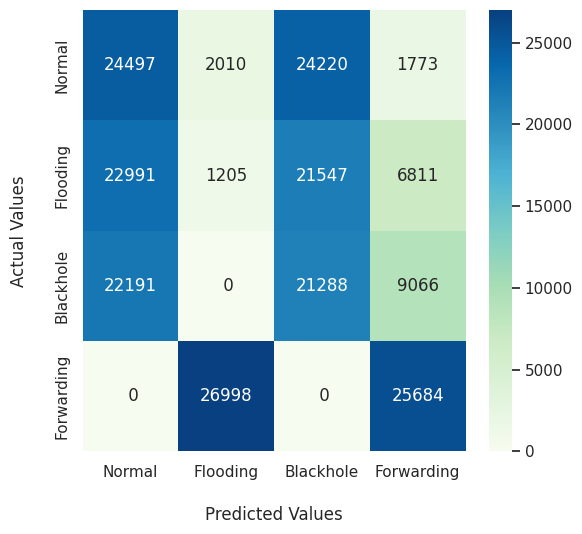

In [41]:
print("Confusion Matrix of K-means") 
conf_mat(y_test, y_test_prediction)

In [42]:
performance("K-means",y_test, y_test_prediction)

Model Name is : K-means
Accuracy : 34.56042153118922
Precision : 32.55618595487272
Recall : 34.56042153118922
F1-Score : 0.3303804722992909


**Begging Method (BM)**

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
y_test_prediction = bg.predict(X_test)

In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[52488    12     0     0]
 [   46 52499     1     8]
 [    8     1 52535     1]
 [    0    18    16 52648]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52500
           1       1.00      1.00      1.00     52554
           2       1.00      1.00      1.00     52545
           3       1.00      1.00      1.00     52682

    accuracy                           1.00    210281
   macro avg       1.00      1.00      1.00    210281
weighted avg       1.00      1.00      1.00    210281



Confusion Matrix of Begging


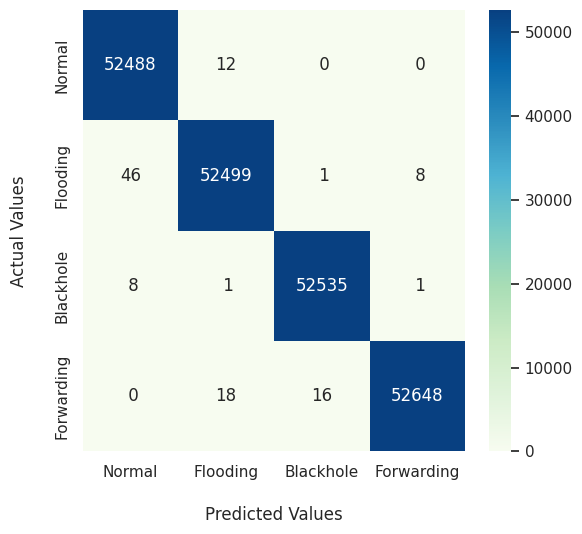

In [45]:
print("Confusion Matrix of Begging") 
conf_mat(y_test, y_test_prediction)

In [46]:
performance("Begging",y_test, y_test_prediction)

Model Name is : Begging
Accuracy : 99.94721349051983
Precision : 99.94722632744758
Recall : 99.94721349051983
F1-Score : 0.9994721309609665


**AdaBoost (AB)**

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)
y_test_prediction = adb.predict(X_test)

In [48]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[51888   491   121     0]
 [ 5498 44520     0  2536]
 [  889     1 51655     0]
 [    0   158   136 52388]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     52500
           1       0.99      0.85      0.91     52554
           2       1.00      0.98      0.99     52545
           3       0.95      0.99      0.97     52682

    accuracy                           0.95    210281
   macro avg       0.96      0.95      0.95    210281
weighted avg       0.96      0.95      0.95    210281



Confusion Matrix of Ada Boost


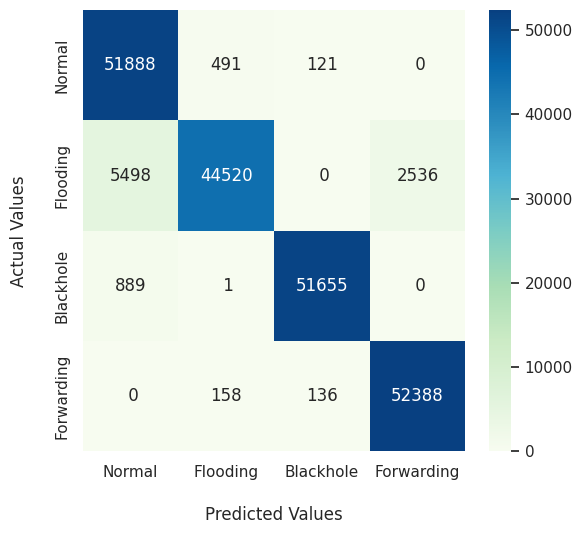

In [49]:
print("Confusion Matrix of Ada Boost") 
conf_mat(y_test, y_test_prediction)

In [50]:
performance("Ada Boost",y_test, y_test_prediction)

Model Name is : Ada Boost
Accuracy : 95.3253028090983
Precision : 95.62351112279615
Recall : 95.3253028090983
F1-Score : 0.9526840967414495


**Random Forest (RF)**

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

In [52]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[47001  4158  1341     0]
 [    6 51141     0  1407]
 [   62   102 51335  1046]
 [    0   240   238 52204]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94     52500
           1       0.92      0.97      0.95     52554
           2       0.97      0.98      0.97     52545
           3       0.96      0.99      0.97     52682

    accuracy                           0.96    210281
   macro avg       0.96      0.96      0.96    210281
weighted avg       0.96      0.96      0.96    210281



Confusion Matrix of Random Forest


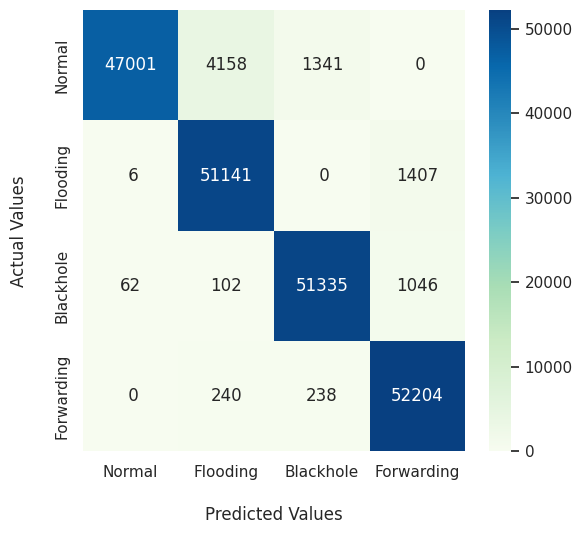

In [53]:
print("Confusion Matrix of Random Forest") 
conf_mat(y_test, y_test_prediction)

In [54]:
performance("Random Forest",y_test, y_test_prediction)

Model Name is : Random Forest
Accuracy : 95.91023440063535
Precision : 96.07261996084611
Recall : 95.91023440063535
F1-Score : 0.9589329140093924


**Multi Voting (MV)**

In [55]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
y_test_prediction = evc.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[32540 11790  8170     0]
 [ 7695 37170  2366  5323]
 [  407  2392 44841  4905]
 [    0     0     0 52682]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70     52500
           1       0.72      0.71      0.72     52554
           2       0.81      0.85      0.83     52545
           3       0.84      1.00      0.91     52682

    accuracy                           0.80    210281
   macro avg       0.79      0.80      0.79    210281
weighted avg       0.79      0.80      0.79    210281



Confusion Matrix of Voting


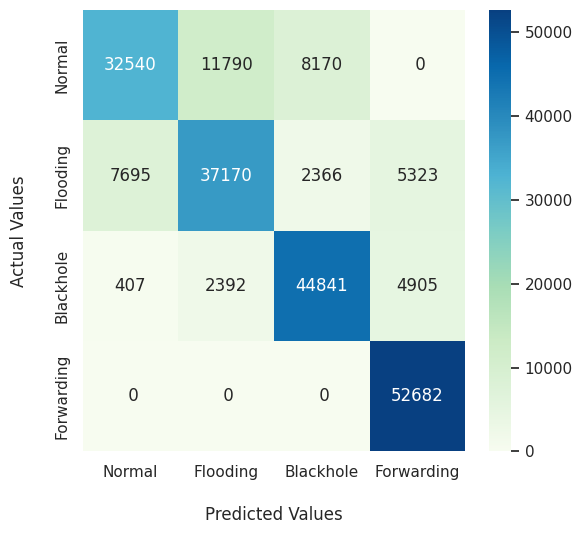

In [57]:
print("Confusion Matrix of Voting") 
conf_mat(y_test, y_test_prediction)

In [58]:
performance("Voting",y_test, y_test_prediction)

Model Name is : Voting
Accuracy : 79.52834540448256
Precision : 79.29334636210923
Recall : 79.52834540448256
F1-Score : 0.7892653753938754
